Notebook untuk melakukan prediksi menggunakan trained model </br>
File label disimpan di labels.txt </br>
Menampilkan hasil prediksi dan probabilitas hasil prediksi suatu gambar </br>


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D
from tensorflow.keras.models  import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img 
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import glob

D:\Anaconda\envs\tubes-tf\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tubes-tf\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tubes-tf\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tubes-tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: P

<h2>====LOAD MODEL====</h2>

In [2]:
trainedModel = load_model('modelConfig2.h5')
trainedModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0         
__________

In [3]:
#load labels
labels = {}
i = 0
with open("labels.txt") as f :
    for line in f:
        labels[i] = line.rstrip('\n')
        i = i + 1

In [4]:
labels

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

In [9]:
#laod image
imgPath = "data-predict/gelar.jpg"

img = load_img(imgPath, target_size=(300,300))
img = img_to_array(img, data_format='channels_last')
img = np.array(img)/255.0

<h2>=====PREDICT IMAGE===== </h2>

In [10]:
pred = trainedModel.predict(img[np.newaxis, ...])

Max Probability :  0.9999831
Classification :  metal


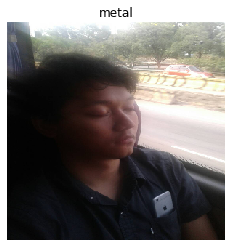

In [11]:
print("Max Probability : ", np.max(pred[0], axis=-1))
predicted_class = labels[np.argmax(pred[0], axis=-1)]
print("Classification : ", predicted_class)

plt.axis("off")
plt.title(predicted_class)
plt.imshow(img.squeeze());

<h2>====PREDICTION PROBABILITY===== </h2>

CARDBOARD : 0.0 %
GLASS : 0.0 %
METAL : 14.51 %
PAPER : 85.38 %
PLASTIC : 0.0 %
TRASH : 0.11 %


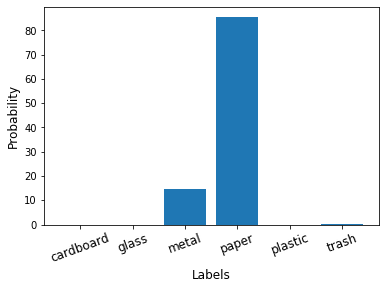

In [8]:
classes = []
probability  = []

for i,j in enumerate(pred[0], 0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    probability.append(round(j*100, 2))

def plotProbability() :
    index = np.arange(len(classes))
    plt.bar(index, probability)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.show()

plotProbability()